In [1]:
# dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# load the data
file_path = "crypto_data.csv"
df = pd.read_csv(file_path)

In [3]:
# check structure and length
df.head()
# len(df.values)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# clear out any cryptocurrencies not traded at the moment
for row in df.iterrows():
    if row[1][3] == False:
        df = df.drop(index = row[0])

In [5]:
# check to make sure df has removed all false
df.head()
len(df.values)

1144

In [6]:
# drop istrading column
df = df.drop("IsTrading", axis=1)
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [7]:
# remove any nulls
df = df.dropna()
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [8]:
# Filter for cryptocurrencies whose total coins mined is be greater than zero
for row in df.iterrows():
    if row[1][4] < 0:
        df = df.drop(index = row[0])
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [9]:
# drop coinnames
df = df.drop("CoinName", axis=1)
df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000


In [10]:
# convert algorithim and prooftype to numeric by using getDummies
df = pd.get_dummies(df, columns=['Algorithm'])
df.head()

,Unnamed: 0,ProofType,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,...,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN,Algorithm_Zhash,Algorithm_vDPOS
0,42,PoW/PoS,4.199995e+01,42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,404,PoW/PoS,1.055185e+09,532000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,808,PoW/PoS,0.000000e+00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1337,PoW/PoS,2.927942e+10,314159265359,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,BTC,PoW,1.792718e+07,21000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df = pd.get_dummies(df, columns=['ProofType'])
df.head()

,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,808,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.columns

Index(['Unnamed: 0', 'TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536', 'Algorithm_Argon2',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S',
       ...
       'ProofType_PoW/PoS', 'ProofType_PoW/PoS ', 'ProofType_PoW/PoW',
       'ProofType_PoW/nPoS', 'ProofType_Pos', 'ProofType_Proof of Authority',
       'ProofType_Proof of Trust', 'ProofType_TPoS',
       'ProofType_Zero-Knowledge Proof', 'ProofType_dPoW/PoW'],
      dtype='object', length=108)

In [13]:
df = df.reset_index()
df = df.drop('index', axis = 1)
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Research: how did they change? They went from 5 columns to 108 columns after creating dummies for each of them

In [14]:
# standardize test set
scaled_df = StandardScaler().fit_transform(df)
print(scaled_df[0:5])

[[-0.10312268 -0.03826639 -0.03826394 -0.03826394 -0.03826394 -0.03826394
  -0.05415304 -0.0766965  -0.03826394 -0.05415304 -0.05415304 -0.03826394
  -0.03826394 -0.18229819 -0.05415304 -0.03826394 -0.03826394 -0.08581241
  -0.03826394 -0.10168448 -0.06637233 -0.03826394 -0.03826394 -0.16439899
  -0.03826394 -0.03826394 -0.13919076 -0.03826394 -0.03826394 -0.0766965
  -0.03826394 -0.03826394 -0.03826394 -0.03826394 -0.06637233 -0.03826394
  -0.0766965  -0.08581241 -0.0766965  -0.03826394 -0.03826394 -0.12784649
  -0.13363062 -0.13919076 -0.03826394 -0.05415304 -0.03826394 -0.06637233
  -0.16903085 -0.03826394 -0.03826394 -0.03826394 -0.0766965  -0.17355253
  -0.3349554  -0.03826394 -0.08581241 -0.06637233 -0.05415304  1.41887838
  -0.06637233 -0.03826394 -0.03826394 -0.06637233 -0.06637233 -0.03826394
  -0.03826394 -0.03826394 -0.03826394 -0.03826394 -0.03826394 -0.03826394
  -0.41622332 -0.03826394 -0.19069252 -0.03826394 -0.10878566 -0.0766965
  -0.09407209 -0.03826394 -0.03826394 -0

In [15]:
# conduct dimensionality reduction in order to scale down the many new columns made by getDummies 
# done with PCA

pca = PCA(n_components=0.9)

crypto_pca = pca.fit_transform(scaled_df)
crypto_pca.shape

#107 to 83 with pca

#df_pca = pd.DataFrame(
#    data=crypto_pca, columns=["principal component 1", "principal component 2","principal component 3",
#                             "principal component 4","principal component 5","principal component 6",
#                             "principal component 7","principal component 8","principal component 9",
#                             "principal component 10","principal component 11"]
#)
#df_pca.head()


(684, 83)

In [17]:
pca.explained_variance_ratio_

array([0.02084017, 0.01964148, 0.01877419, 0.01871896, 0.01871896,
       0.01871896, 0.01871896, 0.01868399, 0.01667483, 0.01598467,
       0.01499161, 0.01480669, 0.01457271, 0.01414731, 0.0131193 ,
       0.01165688, 0.01161312, 0.01117436, 0.01078495, 0.0101309 ,
       0.00961458, 0.00959601, 0.00952498, 0.00950633, 0.0094893 ,
       0.0094691 , 0.00943499, 0.0094141 , 0.00941097, 0.00940461,
       0.00940077, 0.00940077, 0.00940077, 0.00939986, 0.00939301,
       0.00939193, 0.00938697, 0.00938697, 0.00938697, 0.00938272,
       0.00937974, 0.00937827, 0.00937613, 0.00937351, 0.0093732 ,
       0.00937261, 0.0093722 , 0.00936936, 0.00936732, 0.0093658 ,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935948,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935948,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935948,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935948,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935

In [18]:
# further reduce the dataset dimensions with t-SNE

tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)
type(tsne_features)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


numpy.ndarray

In [19]:
print(tsne_features.getfield)

<built-in method getfield of numpy.ndarray object at 0x000001FF60579630>


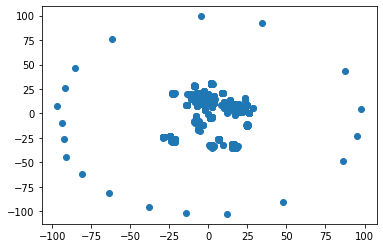

In [20]:
# visualize results
viz_df = pd.DataFrame()
viz_df['x'] = tsne_features[:,0]
viz_df['y'] = tsne_features[:,1]
plt.scatter(viz_df['x'], viz_df['y'])
plt.show()

C:\Users\steph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


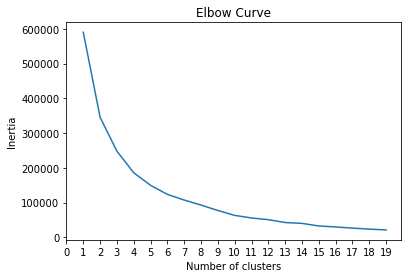

In [21]:
# conduct kmeans analysis


inertia = []
k = list(range(1, 20))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(viz_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(20)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
# Initialize the k-means model
model = KMeans(n_clusters=10, random_state=0)

# Fit the model
model.fit(viz_df)

# Predict clusters
predictions = model.predict(viz_df)

# Add the predicted class column to the dataframe
viz_df["predictions"] = model.labels_
viz_df.head()

,x,y,predictions
0,17.577486,8.842642,2
1,17.525953,1.834516,2
2,-28.798227,-23.597481,4
3,24.743925,-11.040051,2
4,-22.718800,-27.364449,4


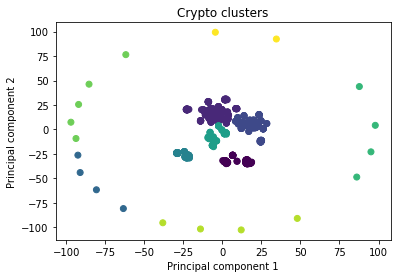

In [26]:
plt.scatter(x=viz_df['x'], y=viz_df['y'], c=viz_df['predictions'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Crypto clusters')
plt.show()

# Recommendation

Some crypto currencies can be clustered and have predictable results but due to the diversity and virulence of the market, there is high variance. Investors are advised to proceed with caution and acquit a cryptocurrency throughly before buying assets.
